In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
import pandas
#data = pandas.read_csv(filename)
col_list = ["Date/Time", "Wind Speed (m/s)"]

data = pandas.read_csv("tfgdatos.csv", usecols=col_list)
data

,Date/Time,Wind Speed (m/s)
0,01 01 2018 00:00,5.311336
1,01 01 2018 00:10,5.672167
2,01 01 2018 00:20,5.216037
3,01 01 2018 00:30,5.659674
4,01 01 2018 00:40,5.577941
...,...,...
50525,31 12 2018 23:10,11.404030
50526,31 12 2018 23:20,7.332648
50527,31 12 2018 23:30,8.435358
50528,31 12 2018 23:40,9.421366


In [3]:
np_data = data.to_numpy()
np_data
print(len(np_data))

50530


In [22]:
#X = np.sort(5 * np.random.rand(40, 1), axis=0)
#y = np_data[:,0]

In [4]:
# Generate data



aux = 0
a = 0
X = np.empty(shape=5053)
y = np.empty(shape=5053)
   
d = np.arange(0,500,10)
aa = data["Wind Speed (m/s)"].ravel()

from sklearn.model_selection import train_test_split
y, y_test = train_test_split(aa, test_size = 0.999, shuffle=False)
X = np.row_stack(d)

In [5]:
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

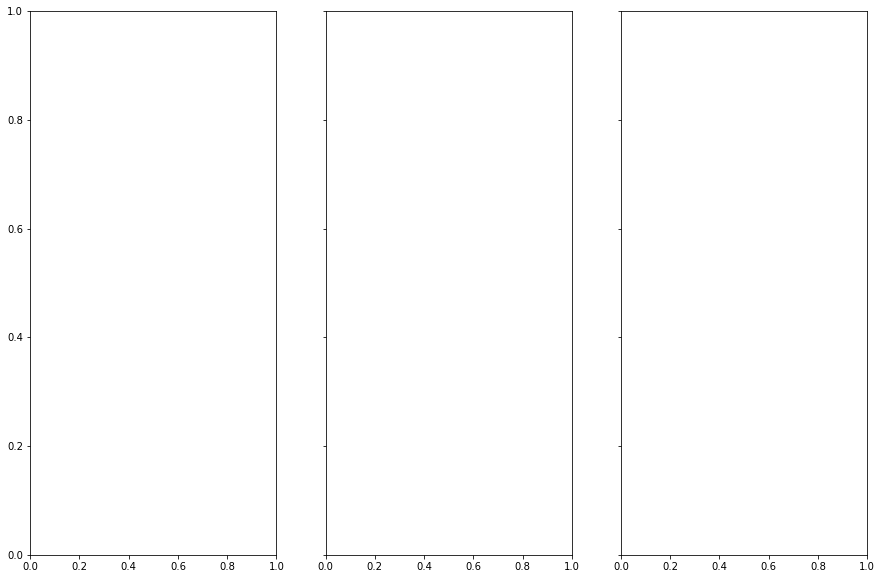

In [6]:
# Look at the results

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)


In [ ]:

for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

In [ ]:
fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)

In [ ]:
plt.show()